In [1]:
import numpy as np

import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Rescaling

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


Load images from directory

In [2]:
img_height = 64
img_width = 64
batch_size = 32

data_dir = "SMILEs"

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13165 files belonging to 2 classes.
Using 10532 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13165 files belonging to 2 classes.
Using 2633 files for validation.


Create model

In [5]:
nb_filters = 64
nb_pool = 2
nb_conv = 3

model = Sequential()

model.add(Rescaling(1./255))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


Train model

In [6]:
# aprox. 6 minutes
model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=5
)

Epoch 1/5


/home/czarek/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


330/330 [==============================] - 44s 132ms/step - loss: 0.4632 - accuracy: 0.7904 - val_loss: 0.3587 - val_accuracy: 0.8443
Epoch 2/5
330/330 [==============================] - 40s 123ms/step - loss: 0.3238 - accuracy: 0.8637 - val_loss: 0.3002 - val_accuracy: 0.8788
Epoch 3/5
330/330 [==============================] - 42s 128ms/step - loss: 0.2857 - accuracy: 0.8833 - val_loss: 0.2914 - val_accuracy: 0.8918
Epoch 4/5
330/330 [==============================] - 45s 135ms/step - loss: 0.2630 - accuracy: 0.8948 - val_loss: 0.2579 - val_accuracy: 0.9054
Epoch 5/5
330/330 [==============================] - 42s 128ms/step - loss: 0.2485 - accuracy: 0.8982 - val_loss: 0.2502 - val_accuracy: 0.9020


Save model

In [7]:
open('model.json', 'w').write(model.to_json())
model.save_weights('weights.h5')

Plot some metrics saved during training

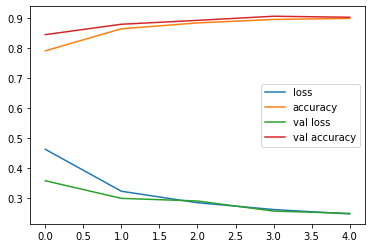

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()